In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [34]:
df = pd.read_csv('..//data/raw/Bengaluru_House_Data.csv')

<Axes: >

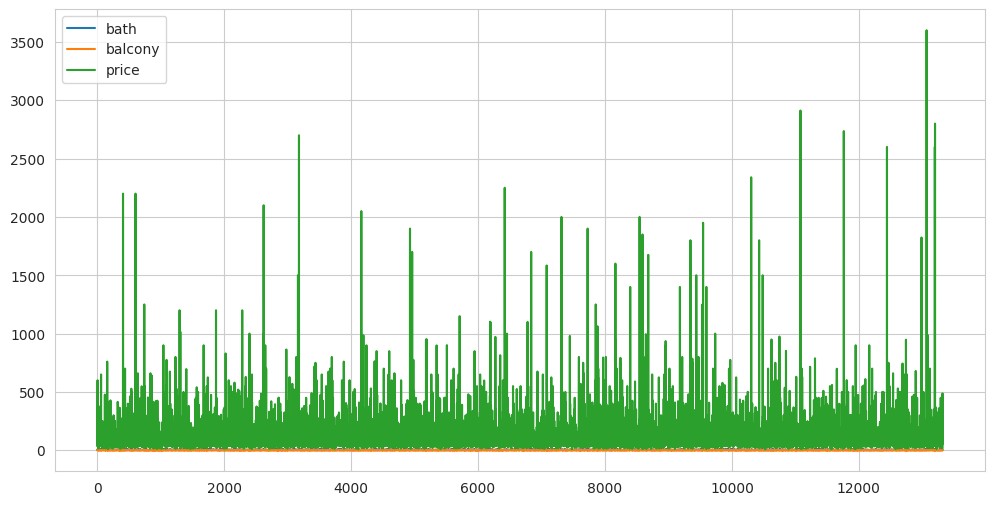

In [35]:
df.plot()

In [36]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape}")
print(f"\ncolumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst few rows:")
df

DATASET OVERVIEW
Shape: (13320, 9)

columns: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

Data Types:
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

First few rows:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [37]:
print("="*60)
print("MISSING DATA")
print("="*60)
missing = df.isnull().sum()
# print(missing)
pct_missing = (missing / len(df)) * 100
# print(pct_missing)
missing_df = pd.DataFrame({
    'Missing_count': missing,
    'Percentage': pct_missing,
}).sort_values('Percentage', ascending = False)

print(missing_df[missing_df['Missing_count'] > 0])

MISSING DATA
          Missing_count  Percentage
society            5502   41.306306
balcony             609    4.572072
bath                 73    0.548048
size                 16    0.120120
location              1    0.007508


In [38]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<Figure size 1000x500 with 0 Axes>

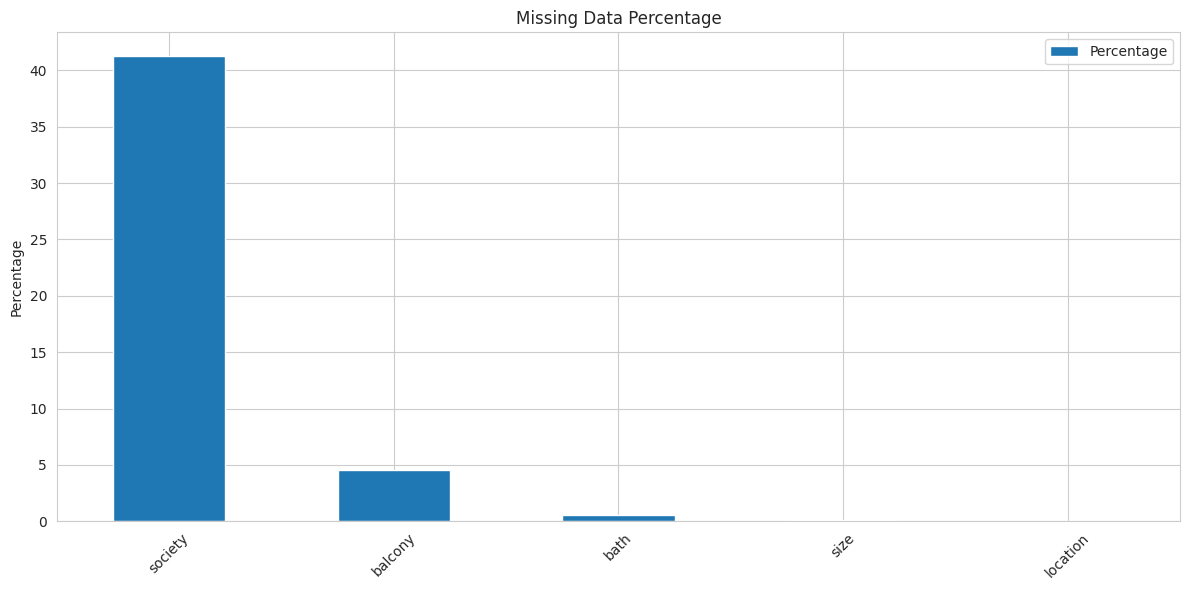

In [39]:
plt.figure(figsize = (10, 5))
missing_df[missing_df['Missing_count'] > 0].plot(kind = "bar", y = "Percentage")
plt.title('Missing Data Percentage')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [40]:
print("="*60)
print("PRICE DISTRIBUTION")
print("="*60)

print(df['price'].describe())

PRICE DISTRIBUTION
count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


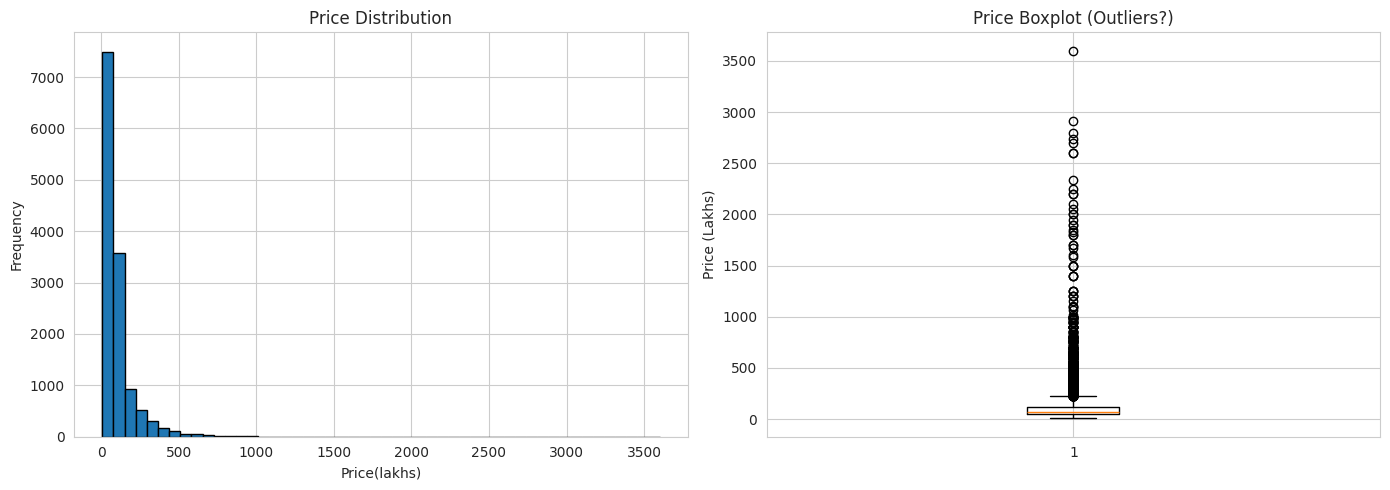


Price Range: 8.00 to 3600.00 Lakhs
Mean Price: 112.57 Lakhs
Median Price: 72.00 Lakhs


In [41]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

#Histogram
axes[0].hist(df['price'].dropna(), bins = 50, edgecolor = 'black')
axes[0].set_xlabel('Price(lakhs)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

#Boxplot
axes[1].boxplot(df['price'].dropna())
axes[1].set_ylabel('Price (Lakhs)')
axes[1].set_title('Price Boxplot (Outliers?)')

plt.tight_layout()
plt.show()

print(f"\nPrice Range: {df['price'].min():.2f} to {df['price'].max():.2f} Lakhs")
print(f"Mean Price: {df['price'].mean():.2f} Lakhs")
print(f"Median Price: {df['price'].median():.2f} Lakhs")

In [42]:
print("="*60)
print("FEATURE EXPLORATION")
print("="*60)

for col in df.columns:
    print(f"\n{'='*50}")
    print(f"Feature: {col}")
    print(f"{'='*50}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample values:")
    print(df[col].value_counts().head(5))

FEATURE EXPLORATION

Feature: area_type
Unique values: 4
Sample values:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Feature: availability
Unique values: 81
Sample values:
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: count, dtype: int64

Feature: location
Unique values: 1305
Sample values:
location
Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: count, dtype: int64

Feature: size
Unique values: 31
Sample values:
size
2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: count, dtype: int64

Feature: society
Unique values: 2688
Sample values:
society
GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
Name: count, dtype: int64

Feature: total_sqft
Unique values: 

In [43]:
print("="*60)
print("FIXING TOTAL_SQFT")
print("="*60)

print(f"Data Type: {df['total_sqft'].dtype}")
print("\nSample values")
print(df['total_sqft'].value_counts().head(20))

print("\n" + "="*60)
print("Non-Numeric Entries")
print("\n" + "="*60)

non_numeric = df[~df['total_sqft'].str.replace(".","",1).str.isdigit()]
print(f"Found {len(non_numeric)} non-numeric entries in total_sqft")
print("\nExamples")
print(non_numeric["total_sqft"].head(20))

FIXING TOTAL_SQFT
Data Type: object

Sample values
total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
1000    172
1350    133
1050    123
1300    117
1250    114
900     112
1400    108
1800    104
1150    101
1600    101
1140     91
2000     83
1450     70
1650     69
800      67
Name: count, dtype: int64

Non-Numeric Entries

Found 247 non-numeric entries in total_sqft

Examples
30        2100 - 2850
56        3010 - 3410
81        2957 - 3450
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
224       1520 - 1740
410    34.46Sq. Meter
549       1195 - 1440
579       1200 - 2400
648         4125Perch
661       1120 - 1145
669       4400 - 6640
672       3090 - 5002
702       4400 - 6800
772       1160 - 1195
775     1000Sq. Meter
801       4000 - 5249
850       1115 - 1130
Name: total_sqft, dtype: object


In [44]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [45]:
def clean_sqft(x):
    if pd.isna(x):
        return np.nan

    x = str(x).strip()

    if '-' in x:
        try:
            values = x.split('-')
            return (float(values[0]) + float(values[1]))/2
        except:
            return np.nan

    if 'Sq' in x:
        try:
            vlaues = float(x.split('Sq')[0].strip())
            return values
        except:
            return np.nan

    if any(unit in x for unit in ["Perch", "Cents", "Guntha", "Grounds", "Bigha"]):
        return np.nan

    try:
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(clean_sqft)

print("="*60)
print("AFTER CLEANING total_sqft")
print("="*60)
print(f"Data type: {df['total_sqft'].dtype}")
print(f"Missing values: {df['total_sqft'].isnull().sum()}")
print(f"\nStats:")
print(df['total_sqft'].describe())

AFTER CLEANING total_sqft
Data type: float64
Missing values: 46

Stats:
count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64


In [46]:
print("="*60)
print("SIZE COLUMN CLEANING")
print("="*60)

print("Current values:")

print(df['size'].value_counts().head(10))
df['bhk'] = df['size'].str.extract('(\d+)').astype(float)

print("\nNew BHK column:")
print(df['bhk'].value_counts().sort_index())

df = df.drop('size', axis=1)

print(f"\nMissing BHK values: {df['bhk'].isnull().sum()}")

SIZE COLUMN CLEANING
Current values:
size
2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
1 BHK         538
2 Bedroom     329
5 Bedroom     297
6 Bedroom     191
1 Bedroom     105
Name: count, dtype: int64

New BHK column:
bhk
1.0      656
2.0     5528
3.0     4857
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
12.0       1
13.0       1
14.0       1
16.0       1
18.0       1
19.0       1
27.0       1
43.0       1
Name: count, dtype: int64

Missing BHK values: 16


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_15280/1061376105.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['bhk'] = df['size'].str.extract('(\d+)').astype(float)


In [47]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2.0


In [48]:
print("="*60)
print("MISSING DATA HANDLING")
print("="*60)

print("Before:")
print(df.isnull().sum())

df = df[df['price'].notna()]

df = df.drop('society', axis = 1)

df = df.dropna(subset=['location', 'total_sqft', 'bhk'])

df['bath'] = df.groupby('bhk')['bath'].transform(lambda x: x.fillna(x.median()))

df['balcony'].fillna(0, inplace = True)

print("\nAfter:")
print(df.isnull().sum())
print(f"\nRemaining rows: {len(df)}")

MISSING DATA HANDLING
Before:
area_type          0
availability       0
location           1
society         5502
total_sqft        46
bath              73
balcony          609
price              0
bhk               16
dtype: int64

After:
area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

Remaining rows: 13257


/tmp/ipykernel_15280/3649761601.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(0, inplace = True)


In [49]:
print("="*60)
print("FEATURE ENGINEERING")
print("="*60)

df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df['bath_per_bhk'] = df['bath'] / df['bhk']
df['is_studio'] = ((df['bhk'] == 1) & (df['total_sqft'] < 500)).astype(int)
print(df[['price', 'total_sqft', 'price_per_sqft', 'bhk', 'bath', 'bath_per_bhk', 'is_studio']].head(10))

print("\nPrice per sqft stats:")
print(df['price_per_sqft'].describe())

FEATURE ENGINEERING
    price  total_sqft  price_per_sqft  bhk  bath  bath_per_bhk  is_studio
0   39.07      1056.0     3699.810606  2.0   2.0      1.000000          0
1  120.00      2600.0     4615.384615  4.0   5.0      1.250000          0
2   62.00      1440.0     4305.555556  3.0   2.0      0.666667          0
3   95.00      1521.0     6245.890861  3.0   3.0      1.000000          0
4   51.00      1200.0     4250.000000  2.0   2.0      1.000000          0
5   38.00      1170.0     3247.863248  2.0   2.0      1.000000          0
6  204.00      2732.0     7467.057101  4.0   4.0      1.000000          0
7  600.00      3300.0    18181.818182  4.0   4.0      1.000000          0
8   63.25      1310.0     4828.244275  3.0   3.0      1.000000          0
9  370.00      1020.0    36274.509804  6.0   6.0      1.000000          0

Price per sqft stats:
count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.

In [50]:
print("="*60)
print("OUTLIER DETECTION & REMOVAL")
print("="*60)

print(f"Before outlier removal: {len(df)} rows")
df['sqft_per_bhk'] = df['total_sqft'] / df['bhk']
df = df[df['sqft_per_bhk'] >= 300]

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"   Range: {lower_bound:.2f} to {upper_bound:.2f}")

df = df[df['bath'] <= df['bhk'] + 2]

location_counts = df['location'].value_counts()
valid_locations = location_counts[location_counts >= 10].index
df = df[df['location'].isin(valid_locations)]

print(f"\nAfter outlier removal: {len(df)} rows")
print(f"Data loss: {100 - (len(df)/13320)*100:.1f}%")
df = df.drop('sqft_per_bhk', axis=1)

OUTLIER DETECTION & REMOVAL
Before outlier removal: 13257 rows
   Range: 151.32 to 10975.88

After outlier removal: 9222 rows
Data loss: 30.8%


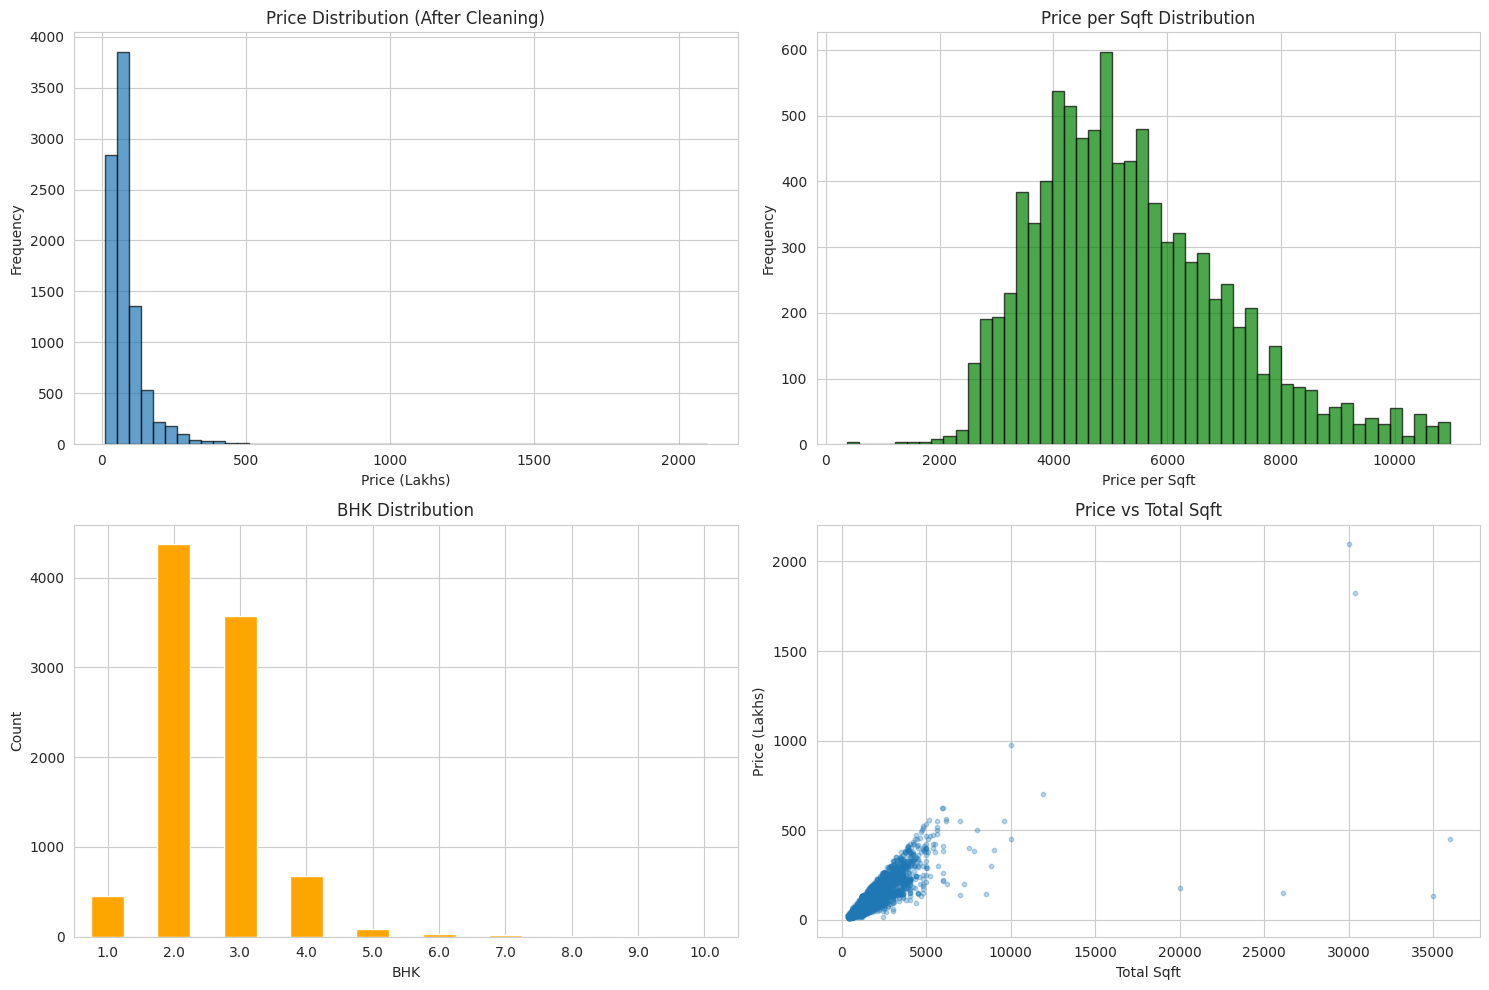

In [51]:
# Cell 11: Visualize Cleaned Data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price distribution after cleaning
axes[0, 0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price (Lakhs)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (After Cleaning)')

# Price per sqft
axes[0, 1].hist(df['price_per_sqft'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Price per Sqft')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price per Sqft Distribution')

# BHK distribution
df['bhk'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_xlabel('BHK')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('BHK Distribution')
axes[1, 0].tick_params(axis='x', rotation=0)

# Price vs Total Sqft
axes[1, 1].scatter(df['total_sqft'], df['price'], alpha=0.3, s=10)
axes[1, 1].set_xlabel('Total Sqft')
axes[1, 1].set_ylabel('Price (Lakhs)')
axes[1, 1].set_title('Price vs Total Sqft')

plt.tight_layout()
plt.show()

In [52]:
print("="*60)
print("LOCATION FEATURE ENGINEERING")
print("="*60)

print(f"Total unique locations: {df['location'].nunique()}")

location_stats = df.groupby('location')['price'].agg(['mean', 'count']).reset_index()
location_stats.columns = ['location', 'mean_price', 'count']
location_stats = location_stats.sort_values('mean_price', ascending=False)

print(location_stats.head(10))
print(location_stats.tail(10))

top_locations = df['location'].head(50).tolist()
df['location_category'] = df['location'].where(
    df['location'].isin(top_locations),
    'other'
)
df['availability_category'] = df['availability'].where(
    df['availability'] == 'Ready To Move',
    'Not Ready To Move'
)
print(f"\nReduced locations from {df['location'].nunique()} to {df['location_category'].nunique()}")
print(df['location_category'])

LOCATION FEATURE ENGINEERING
Total unique locations: 218
                location  mean_price  count
65      Dodsworth Layout  538.200000     10
101        Iblur Village  220.400000     25
132            Kodihalli  214.300000     10
72           Frazer Town  212.778000     25
87      Hebbal Kempapura  181.344828     29
62         Doddaballapur  176.500000     11
166     Old Airport Road  167.957812     32
189  Sector 7 HSR Layout  164.862727     11
178         Rajaji Nagar  162.440645     31
204               Ulsoor  157.923077     13
                        location  mean_price  count
208                 Vasanthapura   42.559091     11
45                 Bisuvanahalli   41.759600     50
67                   Dommasandra   41.028462     13
48   Bommasandra Industrial Area   40.949615     26
80                  Gunjur Palya   39.806000     10
16                        Anekal   38.571429     35
118                  Kammasandra   38.054483     29
129             Kereguddadahalli   34.20666

In [53]:
print("="*60)
print("SAVING CLEANED DATA")
print("="*60)

# Save to processed folder
df.to_csv('../data/processed/cleaned_data.csv', index=False)
print(f"✓ Saved {len(df)} rows to data/processed/cleaned_data.csv")

# Quick summary
print("\nFinal Dataset Summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nMissing values:")
print(df.isnull().sum())
df.info()
df.head()

SAVING CLEANED DATA
✓ Saved 9222 rows to data/processed/cleaned_data.csv

Final Dataset Summary:
Shape: (9222, 13)
Columns: ['area_type', 'availability', 'location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft', 'bath_per_bhk', 'is_studio', 'location_category', 'availability_category']

Missing values:
area_type                0
availability             0
location                 0
total_sqft               0
bath                     0
balcony                  0
price                    0
bhk                      0
price_per_sqft           0
bath_per_bhk             0
is_studio                0
location_category        0
availability_category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9222 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_type              9222 non-null   object 
 1   availability           9222 non-null   object 


,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,is_studio,location_category,availability_category
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606,1.000000,0,Electronic City Phase II,Not Ready To Move
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615,1.250000,0,Chikka Tirupathi,Ready To Move
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556,0.666667,0,Uttarahalli,Ready To Move
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861,1.000000,0,Lingadheeranahalli,Ready To Move
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000,1.000000,0,Kothanur,Ready To Move


In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print("="*60)
print("PREPARING FEATURES FOR MODELING")
print("="*60)

df_model = df.copy()
df_model = pd.get_dummies(df_model, columns=['area_type', 'availability_category', 'location_category'], drop_first = True)
print(f"After one-hot encoding: {df_model.shape}")

X = df_model.drop(['price', 'location', 'availability'], axis=1)
Y = df_model['price']

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {Y.shape}")
print(f"\nFeature columns:")
print(X.columns.tolist())

PREPARING FEATURES FOR MODELING
After one-hot encoding: (9222, 50)

Features (X): (9222, 47)
Target (y): (9222,)

Feature columns:
['total_sqft', 'bath', 'balcony', 'bhk', 'price_per_sqft', 'bath_per_bhk', 'is_studio', 'area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area', 'availability_category_Ready To Move', 'location_category_Begur Road', 'location_category_Bellandur', 'location_category_Bhoganhalli', 'location_category_Binny Pete', 'location_category_Bisuvanahalli', 'location_category_Bommanahalli', 'location_category_Chikka Tirupathi', 'location_category_Chikkalasandra', 'location_category_Devanahalli', 'location_category_Doddathoguru', 'location_category_Electronic City', 'location_category_Electronic City Phase II', 'location_category_Electronics City Phase 1', 'location_category_Gottigere', 'location_category_Gunjur', 'location_category_Hebbal', 'location_category_Kanakpura Road', 'location_category_Kasturi Nagar', 'location_category_Kengeri', 'loc

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9222 entries, 0 to 13319
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   total_sqft                                  9222 non-null   float64
 1   bath                                        9222 non-null   float64
 2   balcony                                     9222 non-null   float64
 3   bhk                                         9222 non-null   float64
 4   price_per_sqft                              9222 non-null   float64
 5   bath_per_bhk                                9222 non-null   float64
 6   is_studio                                   9222 non-null   int64  
 7   area_type_Carpet  Area                      9222 non-null   bool   
 8   area_type_Plot  Area                        9222 non-null   bool   
 9   area_type_Super built-up  Area              9222 non-null   bool   
 10  availability_cat

In [56]:
from sklearn.model_selection import train_test_split

print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size = 0.2,
    random_state = 42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nTarget distribution in train set:")
print(Y_train.describe())

TRAIN-TEST SPLIT
Training set: (7377, 47)
Test set: (1845, 47)

Target distribution in train set:
count    7377.000000
mean       84.370012
std        70.234533
min         9.000000
25%        47.000000
50%        65.000000
75%        97.000000
max      2100.000000
Name: price, dtype: float64


BASELINE MODEL - LINEAR REGRESSION

TEST SET:
  R² Score: 0.6849
  MAE: 10.50 Lakhs
  RMSE: 34.24 Lakhs


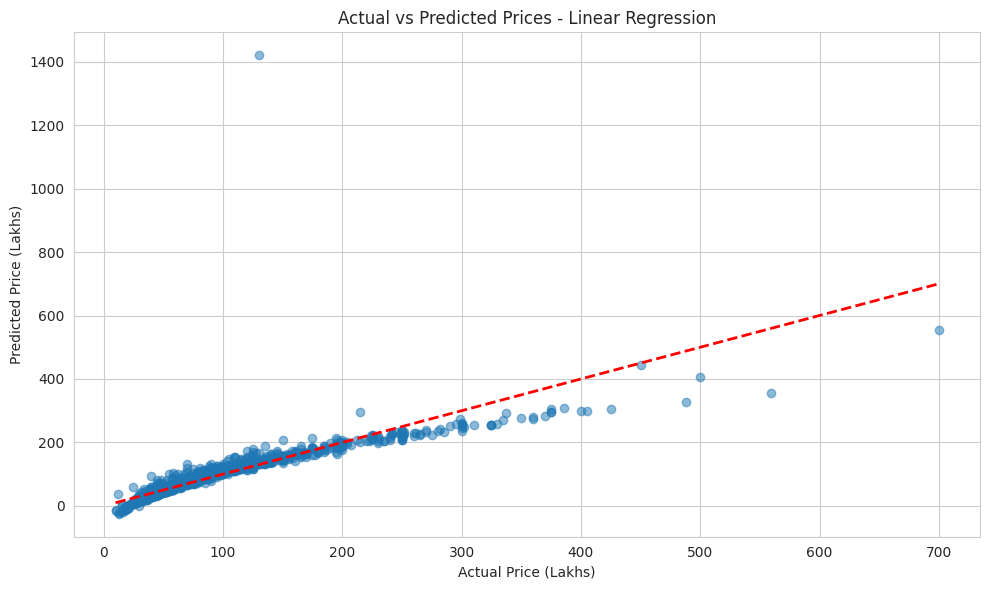

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("="*60)
print("BASELINE MODEL - LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Y_pred_train = lr_model.predict(X_train)
Y_pred_test_rf = lr_model.predict(X_test)

print("\nTEST SET:")
print(f"  R² Score: {r2_score(Y_test, Y_pred_test):.4f}")
print(f"  MAE: {mean_absolute_error(Y_test, Y_pred_test):.2f} Lakhs")
print(f"  RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test)):.2f} Lakhs")

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.tight_layout()
plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import time

print("="*60)
print("RANDOM FOREST MODEL")
print("="*60)

start = time.time()
rf_model = RandomForestRegressor(
    n_estimators = 100,
    max_depth = 15,
    min_samples_split = 5,
    random_state = 42,
    n_jobs = -1
)

rf_model.fit(X_train, Y_train)
time = time.time() - start

print("\nTEST SET:")
print(f"  R² Score: {r2_score(Y_test, Y_pred_test):.4f}")
print(f"  MAE: {mean_absolute_error(Y_test, Y_pred_test):.2f} Lakhs")
print(f"  RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test)):.2f} Lakhs")

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

RANDOM FOREST MODEL

TEST SET:
  R² Score: 0.6849
  MAE: 10.50 Lakhs
  RMSE: 34.24 Lakhs
                             feature  importance
0                         total_sqft    0.778663
4                     price_per_sqft    0.215388
5                       bath_per_bhk    0.003124
41  location_category_Sarjapur  Road    0.000999
1                               bath    0.000619
30        location_category_Kothanur    0.000445
2                            balcony    0.000150
3                                bhk    0.000145
8               area_type_Plot  Area    0.000121
46           location_category_other    0.000067


In [68]:
import xgboost as xgb

print("="*60)
print("XGBOOST MODEL")
print("="*60)

# start = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators = 100,
    max_depth = 7,
    learning_rate = 0.1,
    random_state = 42,
    n_jobs = -1,
)
xgb_model.fit(X_train, Y_train)
# train_time = time.time() - start

Y_pred_test_xgb = xgb_model.predict(X_test)

print("\nTEST SET:")
print(f"  R² Score: {r2_score(Y_test, Y_pred_test):.4f}")
print(f"  MAE: {mean_absolute_error(Y_test, Y_pred_test):.2f} Lakhs")
print(f"  RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test)):.2f} Lakhs")

XGBOOST MODEL

TEST SET:
  R² Score: 0.6849
  MAE: 10.50 Lakhs
  RMSE: 34.24 Lakhs


MODEL COMPARISON
            Model  R² (Test)  MAE (Test)  RMSE (Test)
Linear Regression   0.684886   10.498284    34.242902
    Random Forest   0.684886   10.498284    34.242902
          XGBoost   0.851520    1.630054    23.505556


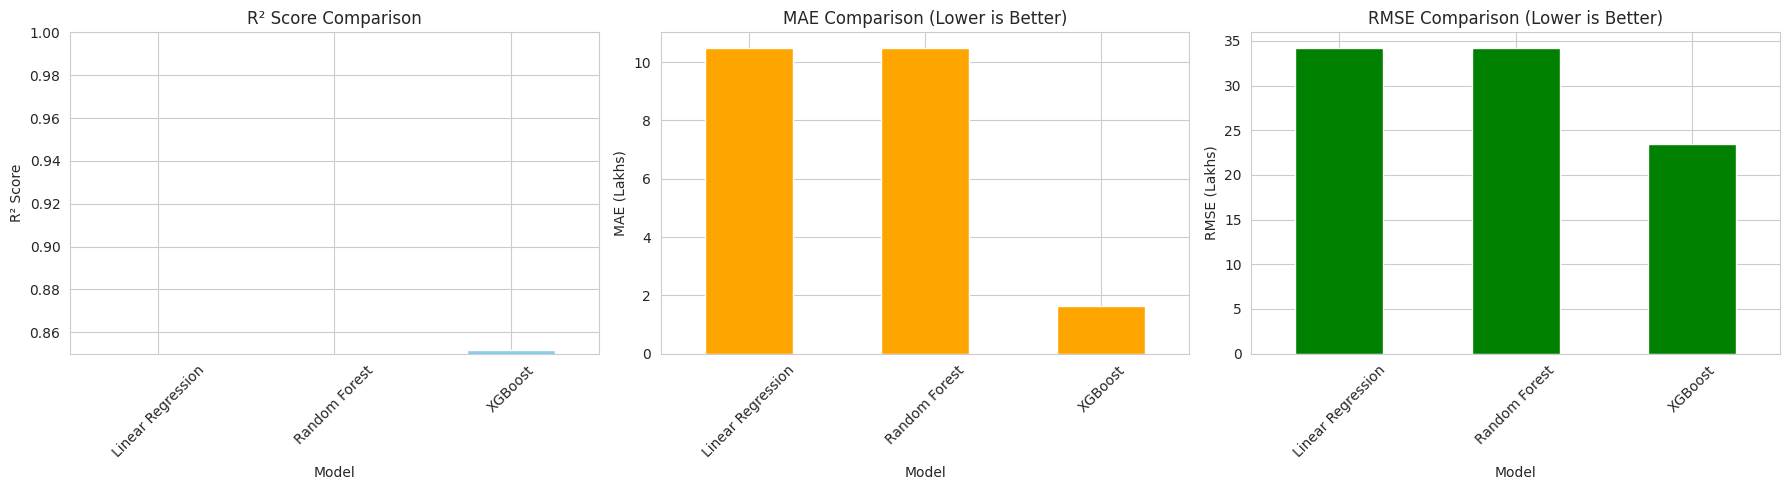


BEST MODEL: XGBoost


In [71]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R² (Test)': [
        r2_score(Y_test, Y_pred_test),
        r2_score(Y_test, Y_pred_test_rf),
        r2_score(Y_test, Y_pred_test_xgb)
    ],
    'MAE (Test)': [
        mean_absolute_error(Y_test, Y_pred_test),
        mean_absolute_error(Y_test, Y_pred_test_rf),
        mean_absolute_error(Y_test, Y_pred_test_xgb)
    ],
    'RMSE (Test)': [
        np.sqrt(mean_squared_error(Y_test, Y_pred_test)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_test_rf)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_test_xgb))
    ]
})

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(results.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

results.plot(x='Model', y='R² (Test)', kind='bar', ax=axes[0], legend=False, color='skyblue')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_ylim([0.85, 1.0])
axes[0].tick_params(axis='x', rotation=45)

results.plot(x='Model', y='MAE (Test)', kind='bar', ax=axes[1], legend=False, color='orange')
axes[1].set_ylabel('MAE (Lakhs)')
axes[1].set_title('MAE Comparison (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)

results.plot(x='Model', y='RMSE (Test)', kind='bar', ax=axes[2], legend=False, color='green')
axes[2].set_ylabel('RMSE (Lakhs)')
axes[2].set_title('RMSE Comparison (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

best_idx = results['R² (Test)'].idxmax()
best_model_name = results.loc[best_idx, 'Model']
print(f"\nBEST MODEL: {best_model_name}")

In [73]:
print("="*60)
print("CROSS-VALIDATION - XGBOOST")
print("="*60)

cv_scores = cross_val_score(
    xgb_model,
    X_train,
    Y_train,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1
)

print(f"Cross Validation Score: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f}")
print(f"Std Deviation: {cv_scores.std():.4f}")

cv_mae = -cross_val_score(
    xgb_model, 
    X_train, 
    Y_train, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

print(f"\nCross-Validation MAE: {cv_mae}")
print(f"Mean MAE: {cv_mae.mean():.2f} Lakhs")
print(f"Std Dev: {cv_mae.std():.2f}")

print("\n✓ Model is stable across different data splits!")

CROSS-VALIDATION - XGBOOST
Cross Validation Score: [0.72196261 0.82691487 0.86920264 0.76416877 0.96046555]
Mean R²: 0.8285
Std Deviation: 0.0831

Cross-Validation MAE: [2.63495188 2.238233   2.26431451 2.1473897  1.47510923]
Mean MAE: 2.15 Lakhs
Std Dev: 0.38

✓ Model is stable across different data splits!


XGBOOST FEATURE IMPORTANCE
Top 15 Most Important Features:
                                    feature  importance
0                                total_sqft    0.472547
8                      area_type_Plot  Area    0.302615
4                            price_per_sqft    0.144358
1                                      bath    0.038558
10      availability_category_Ready To Move    0.015789
5                              bath_per_bhk    0.010942
3                                       bhk    0.009130
9            area_type_Super built-up  Area    0.001538
46                  location_category_other    0.000701
2                                   balcony    0.000669
34           location_category_Marathahalli    0.000485
41         location_category_Sarjapur  Road    0.000456
26                 location_category_Hebbal    0.000327
38  location_category_Raja Rajeshwari Nagar    0.000284
45              location_category_Yelahanka    0.000244


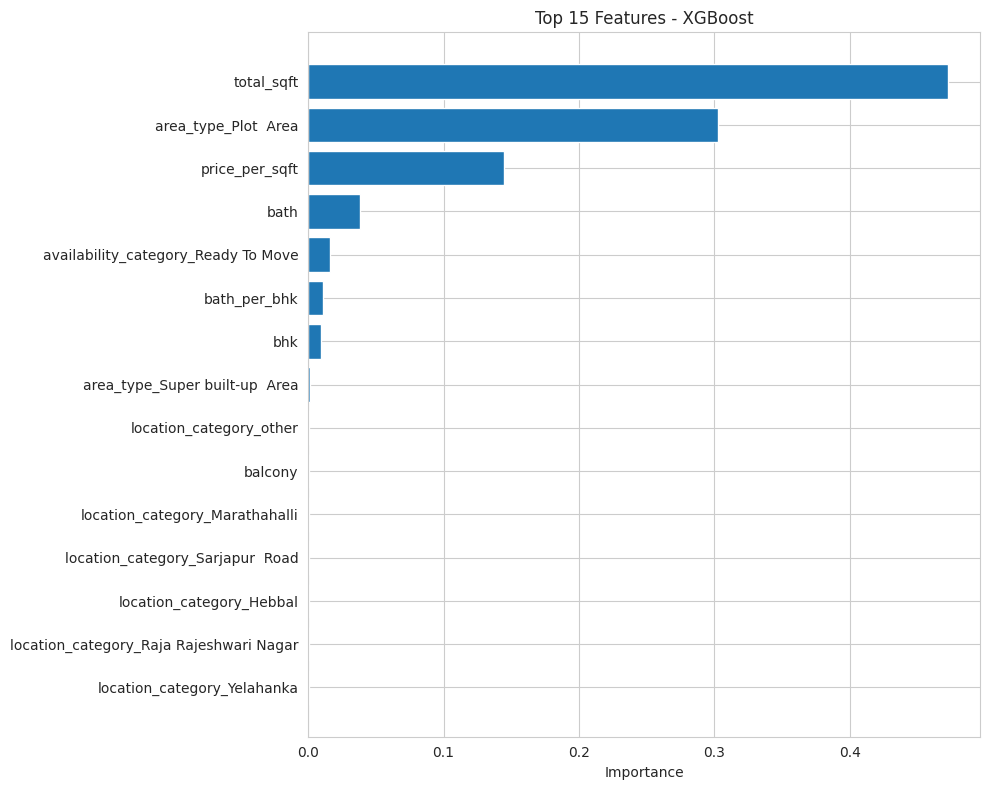

In [74]:
print("="*60)
print("XGBOOST FEATURE IMPORTANCE")
print("="*60)

xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(xgb_importance.head(15))

plt.figure(figsize=(10, 8))
top_features = xgb_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Features - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

RESIDUAL ANALYSIS


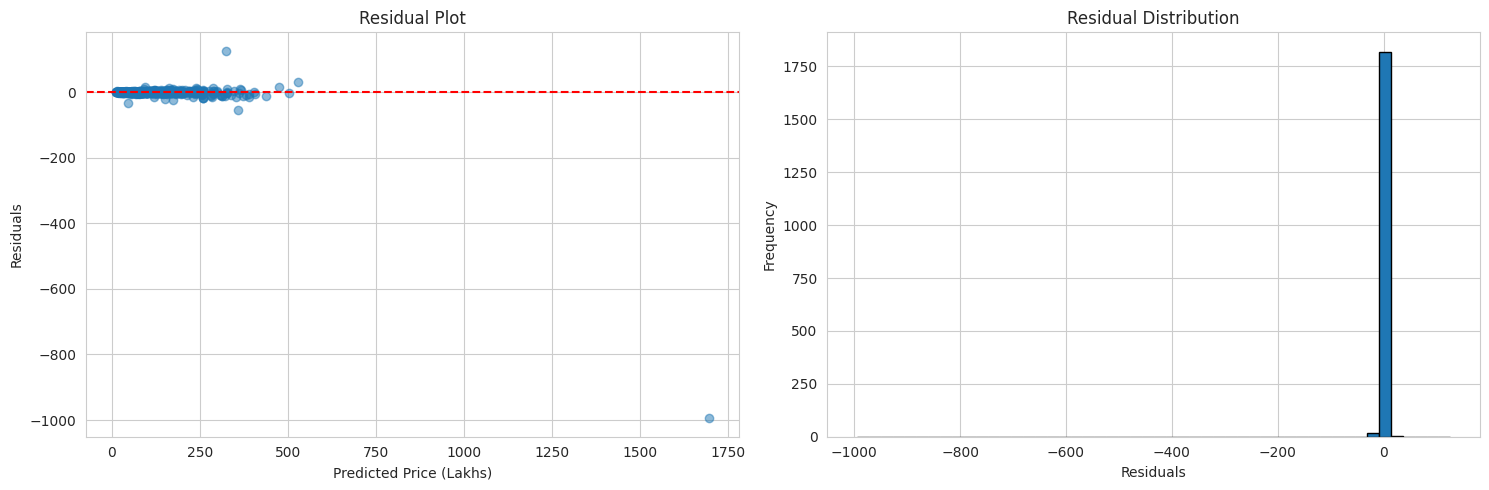

Residual Mean: -0.60 (should be close to 0)
Residual Std: 23.50

Largest prediction errors:
       Actual    Predicted       Error
440     700.0  1694.753784  994.753784
4308    450.0   323.815735  126.184265
2270    302.0   357.787567   55.787567
11748    12.0    45.866234   33.866234
9886    559.0   527.702393   31.297607


In [75]:
print("="*60)
print("RESIDUAL ANALYSIS")
print("="*60)

residuals = Y_test - Y_pred_test_xgb

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(Y_pred_test_xgb, residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price (Lakhs)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

axes[1].hist(residuals, bins=50, edgecolor='black')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution')

plt.tight_layout()
plt.show()

print(f"Residual Mean: {residuals.mean():.2f} (should be close to 0)")
print(f"Residual Std: {residuals.std():.2f}")

print("\nLargest prediction errors:")
errors = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_pred_test_xgb,
    'Error': np.abs(residuals)
})
print(errors.nlargest(5, 'Error'))

In [78]:
import joblib
import json

print("="*60)
print("SAVING MODEL")
print("="*60)

import os
os.makedirs("../models", exist_ok = True)

joblib.dump(xgb_model, "../models/xgboost_model.plk")
print("✓ Saved XGBoost model")

columns_info = {
    'feature_columns': X.columns.tolist(),
    'numeric_features':['total_sqft', 'bath', 'balcony', 'bhk', 'price_per_sqft', 'bath_per_bhk', 'is_studio'],
    'categorical_features': ['area_type', 'availability', 'location_category'],
    'top_locations': top_locations
}

with open('../models/columns.json', 'w') as f:
    json.dump(columns_info, f, indent=2)
print("✓ Saved column info")

sample = X_test.iloc[0].to_dict()
with open('../models/sample_input.json', 'w') as f:
    json.dump(sample, f, indent=2)
print("✓ Saved sample input")

print(f"\nModel artifacts saved to ../models/")
print(f"Files: xgboost_model.pkl, columns.json, sample_input.json")

SAVING MODEL
✓ Saved XGBoost model
✓ Saved column info
✓ Saved sample input

Model artifacts saved to ../models/
Files: xgboost_model.pkl, columns.json, sample_input.json
